This notebook uses the Scientific Python (scipy) stack tools to generate flow duration curves from current USGS NWIS data.

Using recipes from this notebook, you can make:
* USGS Station Summaries
* Flow duration curves
* Iterative import and compilation of USGS station information and data
* boxplots using pandas
* iterative charts (one monthly summary boxplot per station)
* Gantt charts of USGS stations

# Background

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

import platform
import sys

from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt
import matplotlib
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [2]:
import wellapplication as wa

The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.


In [3]:
print("Operating System {:} {:}".format(platform.system(),platform.release()))
print("Python Version {:}".format(sys.version))
print("Pandas Version {:}".format(pd.__version__))
print("Numpy Version {:}".format(np.__version__))
print("Matplotlib Version {:}".format(matplotlib.__version__))
print("Wellapplication Version {:}".format(wa.__version__))

Operating System Windows 7
Python Version 2.7.10 (default, May 23 2015, 09:40:32) [MSC v.1500 32 bit (Intel)]
Pandas Version 0.19.1
Numpy Version 1.11.2
Matplotlib Version 1.5.3
Wellapplication Version 0.4.19


The `nwis` class in wellapplication can pull data from the <a href='https://waterdata.usgs.gov/nwis'>USGS NWIS site</a>.

In [ ]:
logan = wa.nwis('dv','10109000','sites')

In [ ]:
q = 2*T*(h/a)*exp((-1*(np.pi()^2)*T*t)/(4*S*a^2))

In [ ]:
x.rolling(window=60).apply(my_ols)

In [ ]:
logan.data.plot()
plt.yscale('log')
plt.xlim('1/1/1972','1/1/1975')

connection successful


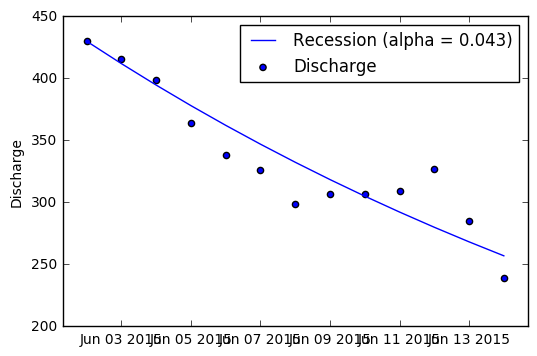

In [4]:
def test_recess():
    ashley = wa.nwis('dv', '09265500','sites', startDT='2015-06-02' ,endDT='2015-06-14')
    rec = wa.graphs.recess(ashley.data, 'value', st=[2015,6,2])
    assert round(rec.rec_results[0],2) == 0.04
    
test_recess()

In [12]:
def test_get_recess_int():
    ashley = wa.nwis('dv', '09265500','sites', startDT='2015-01-02' ,endDT='2015-10-14')
    assert type(wa.get_recess_int(ashley.data, 'value')[0]) == pd.DataFrame

connection successful


True

In [ ]:
ashley = wa.nwis('dv', '09265500','sites', startDT='2014-09-15' ,endDT='2014-10-15')
adata = ashley.data
adata['roll'] = ashley.data.value.rolling(15,center=True).max()
adata['dQ'] = adata.value.diff(1)
adata['shiftQ'] = adata.dQ.shift(1)
adata['dshift'] = adata['dQ'] - adata['shiftQ']
adata[['value','dQ','shiftQ','dshift','roll']]

In [ ]:
import numpy as np
import pandas as pd
from scipy.signal import argrelextrema

In [ ]:
maxlist = adata.index[adata['max'].notnull()]
firstmin = []
for ind in maxlist:
    firstmin.append(adata.ix[ind:,'min'].first_valid_index())

In [ ]:
print(len(firstmin),len(maxlist))

In [ ]:
ashley = wa.nwis('dv', '09265500','sites', startDT='2011-09-15' ,endDT='2016-10-15')


def get_recess_int(df, Q, maxper=18, minper=6, thresh=30, inplace=False):
    if inplace:
        data = df
    else:
        data = df.copy()
    data['max'] = data[Q].rolling(maxper,center=True).max()
    data['max'] = data.ix[data['max'] == data['value'],'max']
    data['max'] = data.ix[data['max'] > thresh, 'max']
    data['min'] = ashley.data.value.rolling(minper,center=True).min()
    data['min'] = data.ix[data['min'] == data['value'],'min']

    maxlist = data.index[data['max'].notnull()]
    firstmin = []
    for ind in maxlist:
        firstmin.append(data.ix[ind:,'min'].first_valid_index())
    data['min'] = data.ix[data.index.isin(firstmin),'min']
    return data, maxlist, firstmin

adata, maxs, mins = get_recess_int(ashley.data, 'value')
    
    
chngpoint = adata[adata['max'] == adata['value']]
chngpoint2 = adata[adata['min'] == adata['value']]
plt.figure()
x = chngpoint.index
y = chngpoint.value

x2 = chngpoint2.index
y2 = chngpoint2.value

ashley.data.value.plot()
plt.scatter(x,y,color='red')
plt.scatter(x2,y2,color='green')
plt.xlim('4/1/2013','11/1/2015')

In [ ]:
adata

In [ ]:
maxlist[0].year, maxlist[0].month, maxlist[0].day

In [ ]:
if firstmin[-1] is None:
    firstmin = firstmin[:-1]
    maxlist = maxlist[:-1]

In [ ]:
rec = []
for m in range(len(maxlist)):
    rec.append(wa.graphs.recess(ashley.data, 'value', 
                           st=[maxlist[m].year,maxlist[m].month,maxlist[m].day], 
                           end=[firstmin[m].year,firstmin[m].month, firstmin[m].day]))

In [ ]:
rec[0]

In [ ]:
logan.sites

In [ ]:
clean_discharge = logan.cleanGWL(discharge)
clean_discharge.head()

In [ ]:
avg = logan.avg_wl()
avg.head()

In [ ]:
logan.out_format

In [ ]:
#wqq = wa.WQP('16010204','huc')
nw = wa.nwis('gwlevels','16010204','huc',siteStatus='all')
df = nw.get_info(siteStatus='all')

In [ ]:
rec = wa.recess()

In [ ]:
df = wa.fdc(logan.data,'value')
assert len(df) == 2

In [ ]:
x = np.arange(1,100,1)
y = np.arange(0.1,10.0,0.1)
w = np.arange(5,500,5)
out = wa.graphs.scatterColor(x,y,w)
assert round(out[0],1) == 0.1